## Name: Ishaun Sinha

## IPS Remote Internship

## Project Name: Housing Price Projection Project

## Algorithm used: Random Forest Regressor

### Importing the libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

### Loading the database

In [6]:
boston_df= load_boston()

In [7]:
df= pd.DataFrame(boston_df.data)

### Head of database

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df.columns= boston_df.feature_names

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
df['PRICE']= boston_df.target

### Shape of database

In [13]:
df.shape

(506, 14)

### Information of database

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Statistical description of database

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking for null values

In [16]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Name of the columns

In [18]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### Distplot for PRICE column

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

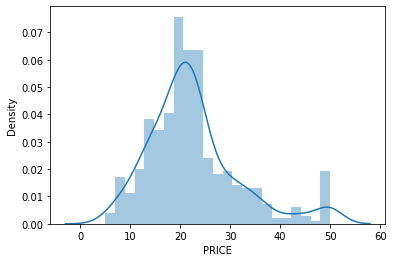

In [20]:
sb.distplot(df['PRICE'])

### Correlation coefficient

In [21]:
corr= df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Correlation Heatmap

<AxesSubplot:>

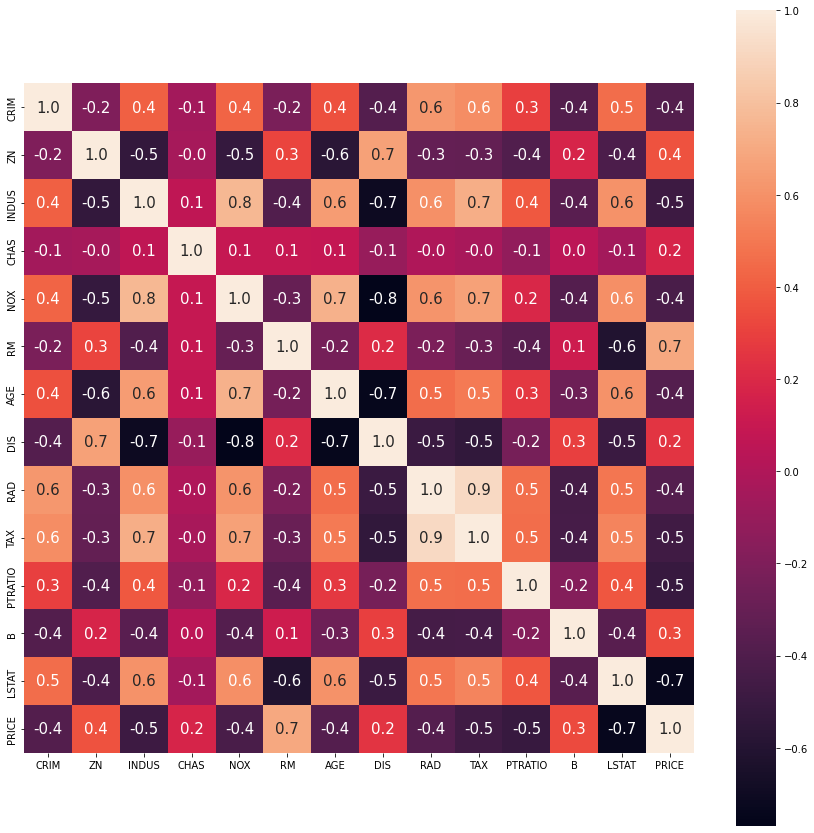

In [31]:
plt.figure(figsize= (15,15))
sb.heatmap(corr,cbar=True, square=True,  fmt='.1f', annot=True, annot_kws= {'size':15})

### Splitting of data

In [55]:
X= df.drop(['PRICE'], axis=1)
y= df['PRICE']

### Splitting the data into training and testing data

In [56]:
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=5)

### Building the model

In [57]:
model= RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### Prediction

In [40]:
ypred= model.predict(X_train)

In [41]:
ypred

array([21.021, 19.335, 47.988, 48.845, 22.645, 10.511, 16.674, 11.276,
       21.302, 14.296,  9.71 , 22.789, 30.15 , 19.585, 16.746, 19.573,
       19.885, 33.796, 48.682, 25.904, 18.86 , 19.652, 23.545, 14.703,
       46.   , 11.952, 11.6  , 24.877, 34.912, 15.721, 24.22 , 33.878,
       31.894, 14.091, 34.063, 15.872, 34.513, 25.383, 18.508, 16.643,
       13.196, 26.792, 26.193, 22.073, 17.819, 15.01 , 21.456, 10.174,
       17.608, 20.901, 31.854, 20.209, 17.227, 29.278, 46.319, 22.202,
       23.328, 20.613, 15.919, 48.501, 24.022, 36.522, 21.789, 19.524,
       19.03 , 22.006, 17.025, 27.109, 10.775, 23.377, 24.284, 20.563,
       18.976, 32.302, 14.905, 27.527, 23.698, 11.931, 31.888, 22.145,
       13.221, 33.617, 14.54 , 22.969, 23.042, 19.681, 19.901, 20.18 ,
       27.192, 20.583, 30.874, 20.901, 19.779, 12.458,  6.619, 23.174,
       20.81 , 22.686, 20.113, 14.442, 29.896, 43.095, 19.17 , 14.793,
       22.629, 15.068, 23.461, 17.181, 21.009, 11.932, 21.786, 12.365,
      

In [42]:
ypred_test= model.predict(X_test)

In [44]:
ypred_test

array([47.11 , 28.504, 22.816, 11.89 , 42.775,  7.91 , 26.987, 26.161,
       23.845, 19.822, 35.475, 20.27 , 20.863, 33.666, 25.455, 19.446,
       12.506, 17.839, 19.297, 26.979, 15.197, 19.502, 47.046, 21.707,
       31.318, 11.108, 24.111, 20.203, 25.392, 25.945, 17.264, 15.54 ,
       11.504, 21.597, 23.348, 19.015, 25.092,  9.903, 47.292, 34.379,
       14.215, 14.364, 25.332, 16.442, 24.384, 29.84 ,  8.254, 18.936,
       19.185, 16.038, 19.569, 20.818, 22.71 , 14.881, 15.939, 22.739,
       44.468, 15.708, 27.518, 20.711, 20.388, 22.671, 16.39 , 31.4  ,
       20.684, 10.064, 18.915, 24.68 , 21.151, 21.263, 16.076, 24.363,
       19.988, 19.589, 35.366, 30.745, 20.224, 15.725, 30.61 , 14.642,
       20.166, 48.385, 18.633, 14.424, 20.15 , 15.007, 19.881, 10.104,
       20.69 , 21.251, 44.481, 18.246, 20.097, 15.532, 23.803, 26.807,
       15.73 , 29.173, 21.786, 16.061, 20.435, 23.429, 14.621, 44.26 ,
        8.875, 18.263, 10.848, 43.833, 22.569, 20.551, 27.4  , 21.956,
      

### Evaluation of accuracy of the model

In [50]:
metrics.r2_score(y_train,ypred)

0.9785912583725105

In [51]:
metrics.mean_absolute_error(y_train,ypred)

0.8552532981530339

In [52]:
metrics.mean_squared_error(y_train,ypred)

1.8191059076517158

### Visualisation

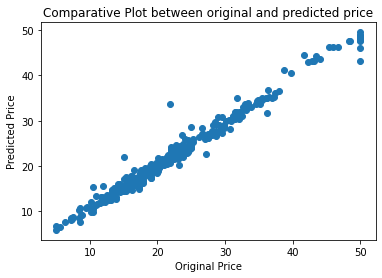

In [54]:
plt.scatter(y_train,ypred)
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Comparative Plot between original and predicted price')
plt.show()

### The accuracy score for the Housing Price Detection model is 97.85% and it is built using Random Forest Regressor